# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bejar
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | ksenyevka
City not found. Skipping...
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | bonthe
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | dunedin
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | te anau
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | lagoa
Processing Record 20 of Set 1 | vershino-darasunskiy
Proc

Processing Record 38 of Set 4 | sapao
City not found. Skipping...
Processing Record 39 of Set 4 | astaneh-ye ashrafiyeh
Processing Record 40 of Set 4 | paris
Processing Record 41 of Set 4 | roald
Processing Record 42 of Set 4 | moron
Processing Record 43 of Set 4 | adrar
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | ligayan
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | kulhudhuffushi
Processing Record 0 of Set 5 | kabanjahe
Processing Record 1 of Set 5 | new norfolk
Processing Record 2 of Set 5 | henties bay
Processing Record 3 of Set 5 | matay
Processing Record 4 of Set 5 | fernandez
Processing Record 5 of Set 5 | malinovoye ozero
Processing Record 6 of Set 5 | amderma
City not found. Skipping...
Processing Record 7 of Set 5 | shahr-e babak
Processing Record 8 of Set 5 | dingle
Processing Record 9 of Set 5 | marawi
P

Processing Record 27 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 28 of Set 8 | severnyy
Processing Record 29 of Set 8 | tosya
Processing Record 30 of Set 8 | atherton
Processing Record 31 of Set 8 | pevek
Processing Record 32 of Set 8 | bay city
Processing Record 33 of Set 8 | tessalit
Processing Record 34 of Set 8 | sorong
Processing Record 35 of Set 8 | okhotsk
Processing Record 36 of Set 8 | havelock
Processing Record 37 of Set 8 | grand gaube
Processing Record 38 of Set 8 | itaituba
Processing Record 39 of Set 8 | souillac
Processing Record 40 of Set 8 | bilma
Processing Record 41 of Set 8 | bathsheba
Processing Record 42 of Set 8 | kupang
Processing Record 43 of Set 8 | lincoln
Processing Record 44 of Set 8 | cervo
Processing Record 45 of Set 8 | mahajanga
Processing Record 46 of Set 8 | lorengau
Processing Record 47 of Set 8 | panzhihua
Processing Record 48 of Set 8 | yongan
Processing Record 49 of Set 8 | maumere
Processing Record 0 of Set 9 | rakitnoye

Processing Record 10 of Set 12 | olinda
Processing Record 11 of Set 12 | naryan-mar
Processing Record 12 of Set 12 | nhulunbuy
Processing Record 13 of Set 12 | ampanihy
Processing Record 14 of Set 12 | ossora
Processing Record 15 of Set 12 | heihe
Processing Record 16 of Set 12 | klaksvik
Processing Record 17 of Set 12 | san luis
Processing Record 18 of Set 12 | garowe
Processing Record 19 of Set 12 | orsha
Processing Record 20 of Set 12 | ozgon
City not found. Skipping...
Processing Record 21 of Set 12 | davila
Processing Record 22 of Set 12 | ciudad bolivar
Processing Record 23 of Set 12 | dongsheng
Processing Record 24 of Set 12 | miri
Processing Record 25 of Set 12 | bograd
Processing Record 26 of Set 12 | margate
Processing Record 27 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 28 of Set 12 | conakry
Processing Record 29 of Set 12 | trincomalee
Processing Record 30 of Set 12 | kamenka
Processing Record 31 of Set 12 | little current
Processing Record 32 of Se

In [98]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lon           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [99]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bejar,40.3864,-5.7634,8.10,90,81,1.09,ES,1670384534
1,chokurdakh,70.6333,147.9167,-20.87,97,100,1.13,RU,1670384535
2,barrow,71.2906,-156.7887,-8.99,79,100,9.26,US,1670384535
3,albany,42.6001,-73.9662,11.43,93,100,3.13,US,1670384249
4,kapaa,22.0752,-159.3190,27.18,86,100,5.14,US,1670384536


In [100]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [101]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bejar,40.3864,-5.7634,8.10,90,81,1.09,ES,1670384534
1,chokurdakh,70.6333,147.9167,-20.87,97,100,1.13,RU,1670384535
2,barrow,71.2906,-156.7887,-8.99,79,100,9.26,US,1670384535
3,albany,42.6001,-73.9662,11.43,93,100,3.13,US,1670384249
4,kapaa,22.0752,-159.3190,27.18,86,100,5.14,US,1670384536


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

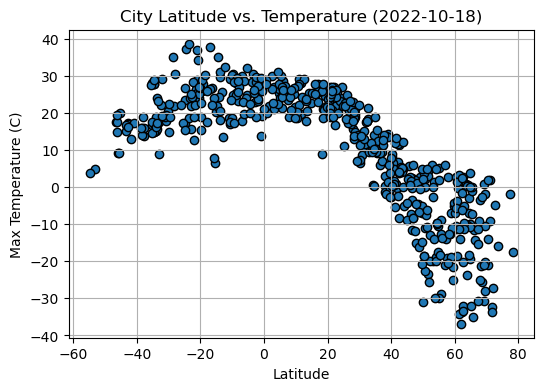

In [102]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(city_data_df["Lat"], city_data_df["Max Temp"]
          , edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

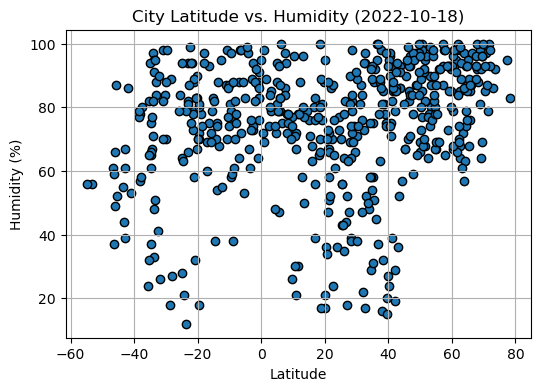

In [103]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(city_data_df["Lat"], city_data_df["Humidity"]
          , edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

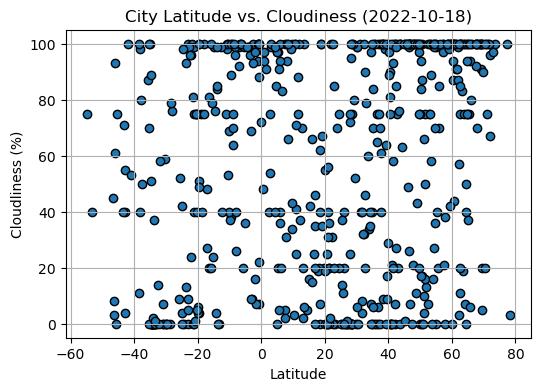

In [104]:
# Build the scatter plots for latitude vs. Cloudiness
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(city_data_df["Lat"], city_data_df["Cloudiness"]
          , edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudliness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

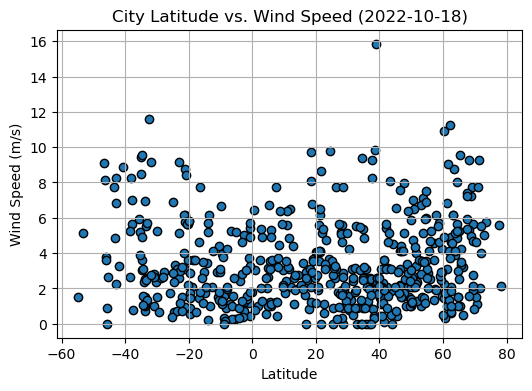

In [105]:
# Build the scatter plots for latitude vs. wind speed 
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(city_data_df["Lat"], city_data_df["Wind Speed"]
          , edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [106]:
# Define a function to create Linear Regression plots

def lin_regress(x_value, y_value, y_label, title):

    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq, title, fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()


In [107]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0, :])

# Display sample data
northern_hemi_df.head()


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bejar,40.3864,-5.7634,8.10,90,81,1.09,ES,1670384534
1,chokurdakh,70.6333,147.9167,-20.87,97,100,1.13,RU,1670384535
2,barrow,71.2906,-156.7887,-8.99,79,100,9.26,US,1670384535
3,albany,42.6001,-73.9662,11.43,93,100,3.13,US,1670384249
4,kapaa,22.0752,-159.3190,27.18,86,100,5.14,US,1670384536


In [108]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df['Lat']<=0, :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,punta arenas,-53.1500,-70.9167,5.06,56,40,5.14,CL,1670384536
8,vaini,-21.2000,-175.2000,29.09,79,75,3.09,TO,1670384538
9,busselton,-33.6500,115.3333,24.12,33,1,0.73,AU,1670384538
10,alofi,-19.0595,-169.9187,27.94,78,75,2.06,NU,1670384539
11,dunedin,-45.8742,170.5036,9.33,66,93,0.89,NZ,1670384501


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8642965310204749


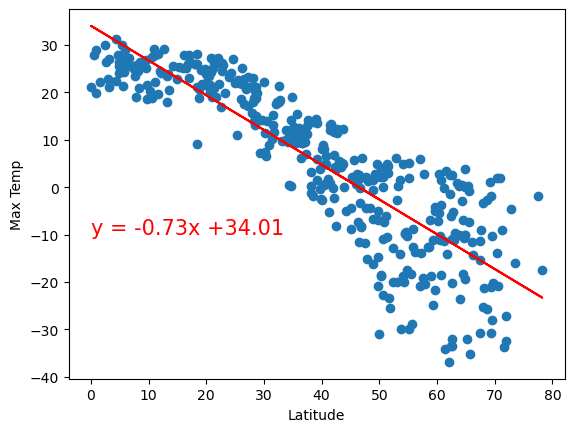

In [109]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
lin_regress(x, y, 'Max Temp', (0,-10))


The r-value is: 0.49138385395738116


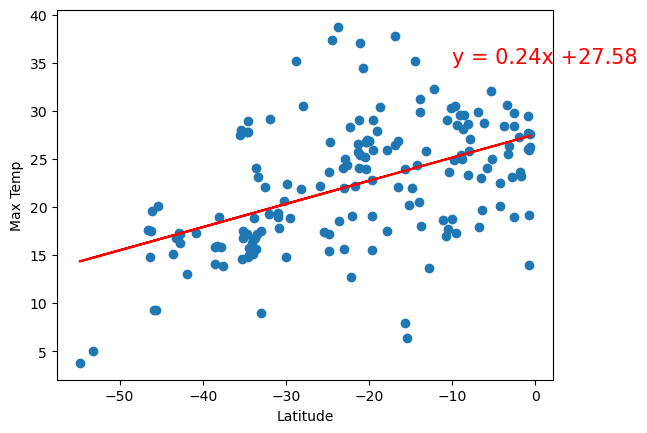

In [117]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
lin_regress(x, y, 'Max Temp', (-10,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.31039814775309027


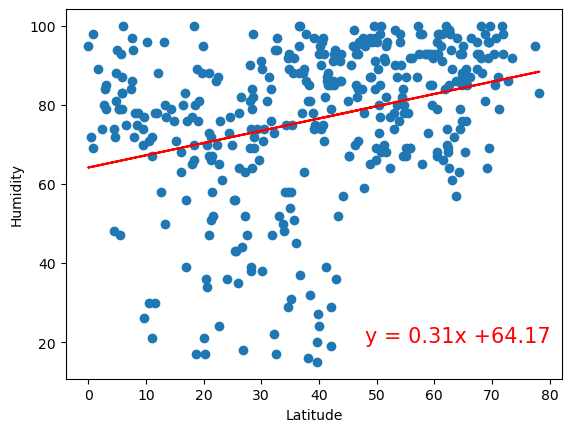

In [111]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
lin_regress(x, y, 'Humidity', (48,20))


The r-value is: 0.30973627626624384


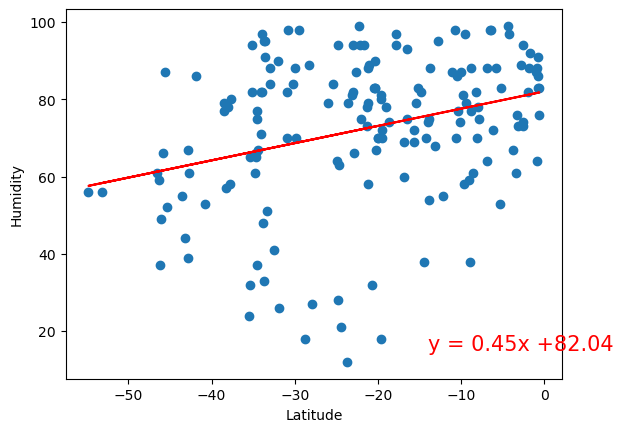

In [112]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
lin_regress(x, y, 'Humidity', (-14,15))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24920963871863977


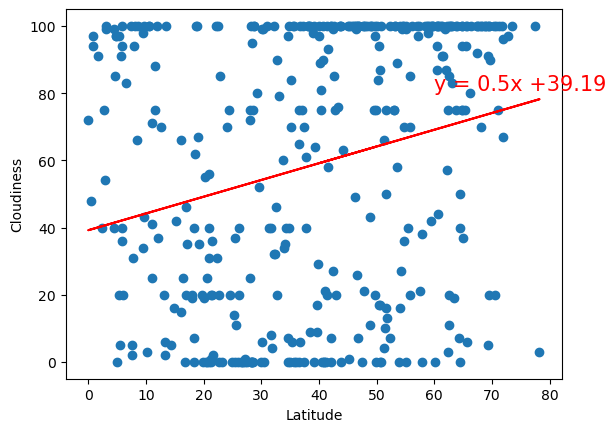

In [113]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
lin_regress(x, y, 'Cloudiness', (60,81))


The r-value is: 0.3421769794380921


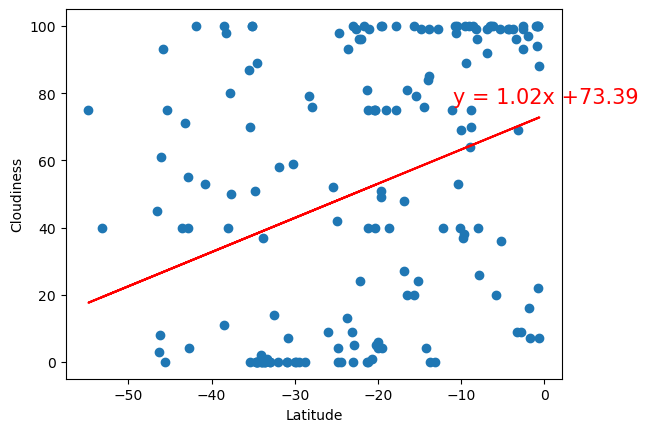

In [114]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
lin_regress(x, y, 'Cloudiness', (-11,77))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1369689858271781


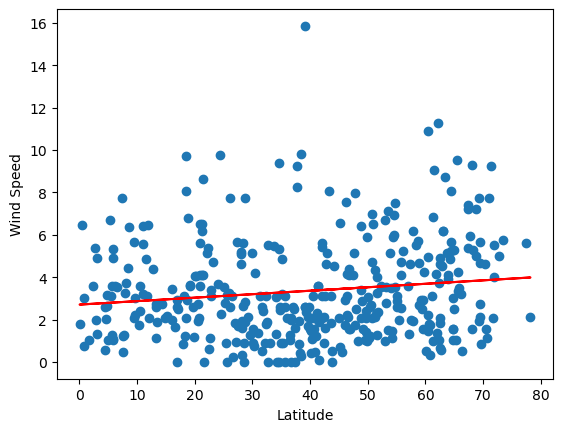

In [115]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
lin_regress(x, y, 'Wind Speed', (50,30))


The r-value is: -0.30365571906096733


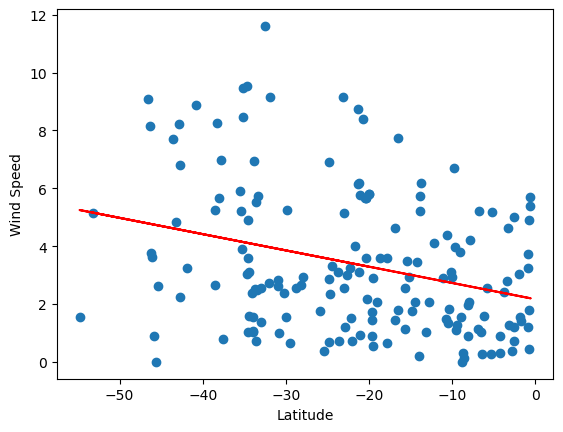

In [116]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
lin_regress(x, y, 'Wind Speed', (-20,22))

**Discussion about the linear relationship:** YOUR RESPONSE HERE